In [ ]:
!pip install catboost
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import Ridge,Lasso,ElasticNet,LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from catboost import CatBoostRegressor

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 2.2 MB/s eta 0:00:00


Library Selection and Document read

In [ ]:
df=pd.read_csv('/content/sample_data/Melbourne_housing_FULL.csv')
df_copy=df.copy()

Some Information About Variables in Dataset

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [ ]:
print(df_copy.size)
print(df_copy.shape)
print(df_copy.ndim)

731997
(34857, 21)
2


In [ ]:
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.0,3.031012e+00,0.969933,1.00000,2.00000,3.0000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.00000,870000.0000,1.295000e+06,1.120000e+07
Distance,34856.0,1.118493e+01,6.788892,0.00000,6.40000,10.3000,1.400000e+01,4.810000e+01
Postcode,34856.0,3.116063e+03,109.023903,3000.00000,3051.00000,3103.0000,3.156000e+03,3.978000e+03
Bedroom2,26640.0,3.084647e+00,0.980690,0.00000,2.00000,3.0000,4.000000e+00,3.000000e+01
Bathroom,26631.0,1.624798e+00,0.724212,0.00000,1.00000,2.0000,2.000000e+00,1.200000e+01
Car,26129.0,1.728845e+00,1.010771,0.00000,1.00000,2.0000,2.000000e+00,2.600000e+01
Landsize,23047.0,5.935990e+02,3398.841946,0.00000,224.00000,521.0000,6.700000e+02,4.330140e+05
BuildingArea,13742.0,1.602564e+02,401.267060,0.00000,102.00000,136.0000,1.880000e+02,4.451500e+04
YearBuilt,15551.0,1.965290e+03,37.328178,1196.00000,1940.00000,1970.0000,2.000000e+03,2.106000e+03


Converting Objects to Categorical Variables

In [ ]:
print(df_copy.select_dtypes(['object']).columns)
obj_to_cat=['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname']


Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname'],
      dtype='object')


In [ ]:
for colname in obj_to_cat:
    df_copy[colname]=df_copy[colname].astype('category')

Duplicated Variable Detection and Dropping

In [ ]:
df_copy.duplicated().sum()

1

In [ ]:
df_copy.loc[df_copy.duplicated(keep=False),:]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
15857,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,17/06/2017,15.4,3131.0,...,3.0,2.0,405.0,226.0,2000.0,Manningham City Council,-37.82678,145.16777,Eastern Metropolitan,4973.0
15858,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,17/06/2017,15.4,3131.0,...,3.0,2.0,405.0,226.0,2000.0,Manningham City Council,-37.82678,145.16777,Eastern Metropolitan,4973.0


In [ ]:
df_copy.drop_duplicates(inplace=True)

Unique Variable Numbers

In [ ]:
df_copy.nunique()

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

Seperating Categorical and Numerical Values

In [ ]:
num_cols=["Rooms","Distance","Price","Postcode","Bedroom2","Bathroom","Car","Landsize","BuildingArea" ,"YearBuilt","Lattitude","Longtitude",
            "Propertycount"]
cat_cols=['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea','Regionname']

Outlier Detection and Handling

In [ ]:
def OTH(df,col_name, low_quantile=0.25,up_quantile=0.75):
    Q1=df[col_name].quantile(low_quantile)
    Q3=df[col_name].quantile(up_quantile)
    IQR=Q3-Q1
    low_limit=Q1-1.5*IQR
    up_limit=Q3+1.5*IQR
    print(col_name,low_limit,up_limit)
    return low_limit,up_limit


In [ ]:
def detection(dataframe,col_name):
    low_limit,up_limit=OTH(dataframe,col_name)
    if dataframe[(dataframe[col_name]>up_limit)| (dataframe[col_name]<low_limit)].any(axis=None):
                                                  return True
    else:
                                                  return False


In [ ]:
for col in num_cols:
    print(col,detection(df_copy,col))


Rooms -1.0 7.0
Rooms True
Distance -4.999999999999998 25.4
Distance True
Price -355000.0 2285000.0
Price True
Postcode 2893.5 3313.5
Postcode True
Bedroom2 -1.0 7.0
Bedroom2 True
Bathroom -0.5 3.5
Bathroom True
Car -0.5 3.5
Car True
Landsize -445.0 1339.0
Landsize True
BuildingArea -27.0 317.0
BuildingArea True
YearBuilt 1850.0 2090.0
YearBuilt True
Lattitude -38.02623625 -37.59080625
Lattitude True
Longtitude 144.72590000000002 145.27949999999998
Longtitude True
Propertycount -4655.5 19452.5
Propertycount True


In [ ]:
def replace(dataframe,variables):
    low_limit, up_limit= OTH(dataframe,variables)
    dataframe.loc[(dataframe[variables]<low_limit),variables]=low_limit
    dataframe.loc[(dataframe[variables]>up_limit),variables]=up_limit



In [ ]:
for col in num_cols:
    print(col,replace(df_copy,col))


Rooms -1.0 7.0
Rooms None
Distance -4.999999999999998 25.4
Distance None
Price -355000.0 2285000.0
Price None
Postcode 2893.5 3313.5
Postcode None
Bedroom2 -1.0 7.0
Bedroom2 None
Bathroom -0.5 3.5
Bathroom None
Car -0.5 3.5
Car None
Landsize -445.0 1339.0
Landsize None
BuildingArea -27.0 317.0
BuildingArea None
YearBuilt 1850.0 2090.0
YearBuilt None
Lattitude -38.02623625 -37.59080625
Lattitude None
Longtitude 144.72590000000002 145.27949999999998
Longtitude None
Propertycount -4655.5 19452.5
Propertycount None


Comparison Between Dataset With Outlier vs Without Outlier

Text(0.5, 1.0, 'BuildingArea Box Plot wo Outlier')

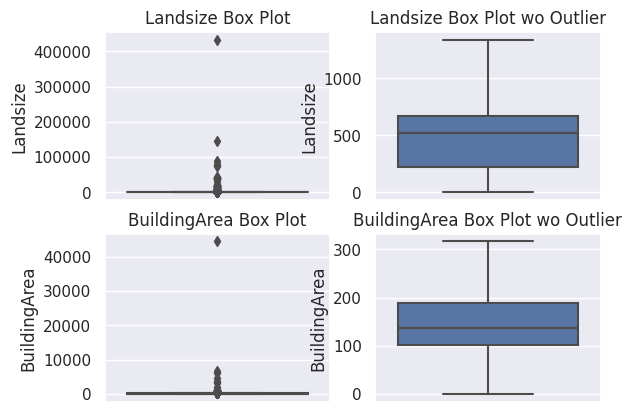

In [ ]:
plt.subplot(2,2,1)
sns.boxplot(y="Landsize",data=df)
plt.title("Landsize Box Plot");

plt.subplot(2,2,2)
sns.boxplot(y="Landsize",data=df_copy)
plt.title("Landsize Box Plot wo Outlier");

plt.subplot(2,2,3)
sns.boxplot(y="BuildingArea",data=df)
plt.title("BuildingArea Box Plot")

plt.subplot(2,2,4)
sns.boxplot(y="BuildingArea",data=df_copy)
plt.title("BuildingArea Box Plot wo Outlier")





Missing Values Detection and Handling

In [ ]:
df_copy.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7609
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [ ]:
df_copy.isnull().mean()*100


Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price            21.829814
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.002869
Postcode          0.002869
Bedroom2         23.574134
Bathroom         23.599954
Car              25.040165
Landsize         33.882258
BuildingArea     60.577806
YearBuilt        55.387882
CouncilArea       0.008607
Lattitude        22.882717
Longtitude       22.882717
Regionname        0.008607
Propertycount     0.008607
dtype: float64

Drop all dependent variable missing values

In [ ]:
Dropping_Value=["Price"]
df_copy.dropna(subset=Dropping_Value,inplace=True)

In [ ]:
nums_new=df_copy[num_cols]

In [ ]:
nums_new.isnull().sum()

Rooms                0
Distance             1
Price                0
Postcode             1
Bedroom2          6441
Bathroom          6447
Car               6824
Landsize          9265
BuildingArea     16591
YearBuilt        15163
Lattitude         6254
Longtitude        6254
Propertycount        3
dtype: int64

In [ ]:
nums_new=nums_new.apply(lambda x: x.fillna(x.mean()),axis=0)
nums_new.head()

,Rooms,Distance,Price,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
1,2,2.5,1480000.0,3067.0,2.0,1.0,1.0,202.0,146.36963,1966.667411,-37.7996,144.9984,4019.0
2,2,2.5,1035000.0,3067.0,2.0,1.0,0.0,156.0,79.00000,1900.000000,-37.8079,144.9934,4019.0
4,3,2.5,1465000.0,3067.0,3.0,2.0,0.0,134.0,150.00000,1900.000000,-37.8093,144.9944,4019.0
5,3,2.5,850000.0,3067.0,3.0,2.0,1.0,94.0,146.36963,1966.667411,-37.7969,144.9969,4019.0
6,4,2.5,1600000.0,3067.0,3.0,1.0,2.0,120.0,142.00000,2014.000000,-37.8072,144.9941,4019.0


In [ ]:
cat_cols_new=df_copy.select_dtypes("category")

In [ ]:
cat_cols_new=cat_cols_new.apply(lambda x:x.fillna(x.mode()))

In [ ]:
df_new_copy=pd.concat([cat_cols_new,nums_new],axis=1)

Data Visualization(Price variable)

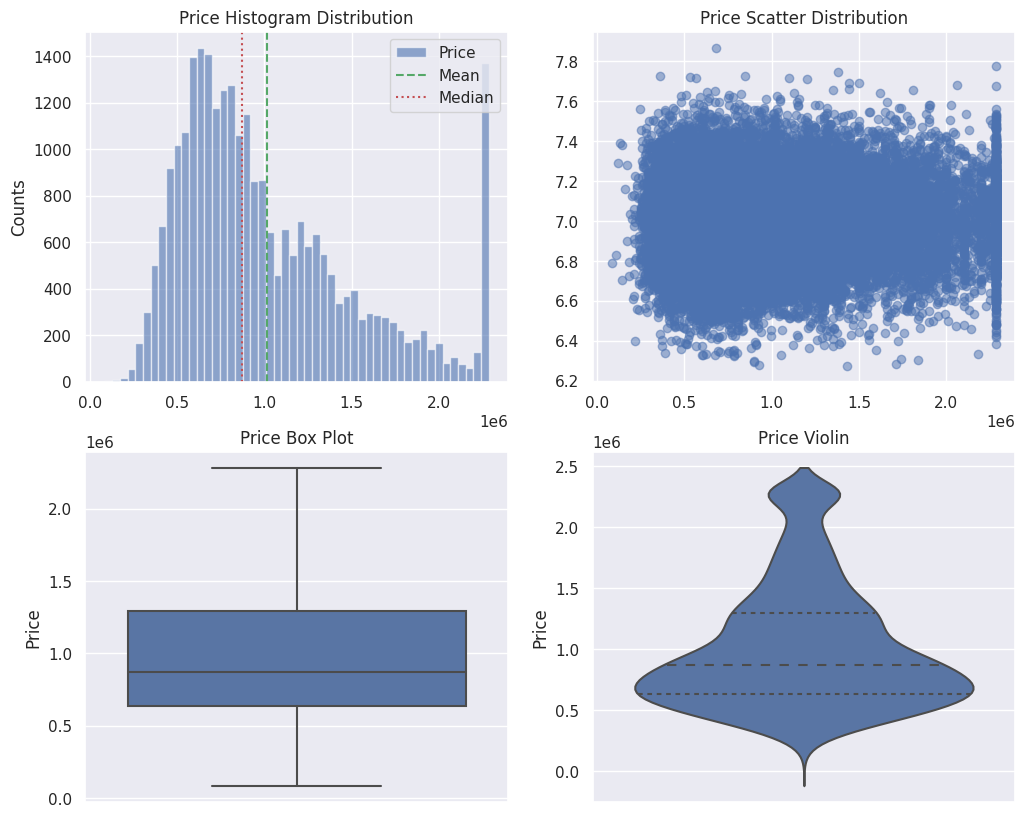

In [ ]:
plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
df_new_copy["Price"].hist(bins=50,label="Price",alpha=0.6)
plt.axvline(np.mean(df_new_copy["Price"]),ls="--",c="g",label="Mean")
plt.axvline(np.median(df_new_copy["Price"]),ls=":",c="r",label="Median")
plt.ylabel("Counts")
plt.title("Price Histogram Distribution");
plt.legend()

plt.subplot(2,2,2)
plt.scatter(df_new_copy["Price"],np.random.normal(7,0.2,size=df_copy.shape[0]),alpha=0.5)
plt.title("Price Scatter Distribution");

plt.subplot(2,2,3)
sns.boxplot(y="Price",data=df_new_copy)
plt.title("Price Box Plot");

plt.subplot(2,2,4)
sns.violinplot(y="Price",data=df_new_copy,inner="quartile",bw=0.2)
plt.title("Price Violin");

<Figure size 5000x5000 with 0 Axes>

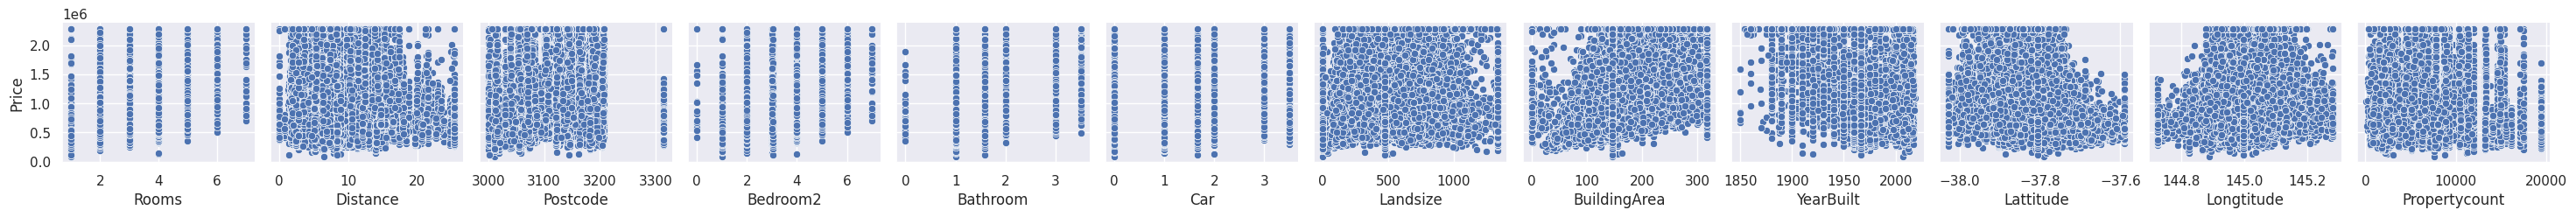

In [108]:
plt.figure(figsize=(50,50))
sns.pairplot(data=df_new_copy,
             y_vars=["Price"],
             x_vars=["Rooms","Distance","Postcode","Bedroom2","Bathroom","Car","Landsize","BuildingArea" ,"YearBuilt","Lattitude","Longtitude",
            "Propertycount"])

Heatmap

<Axes: >

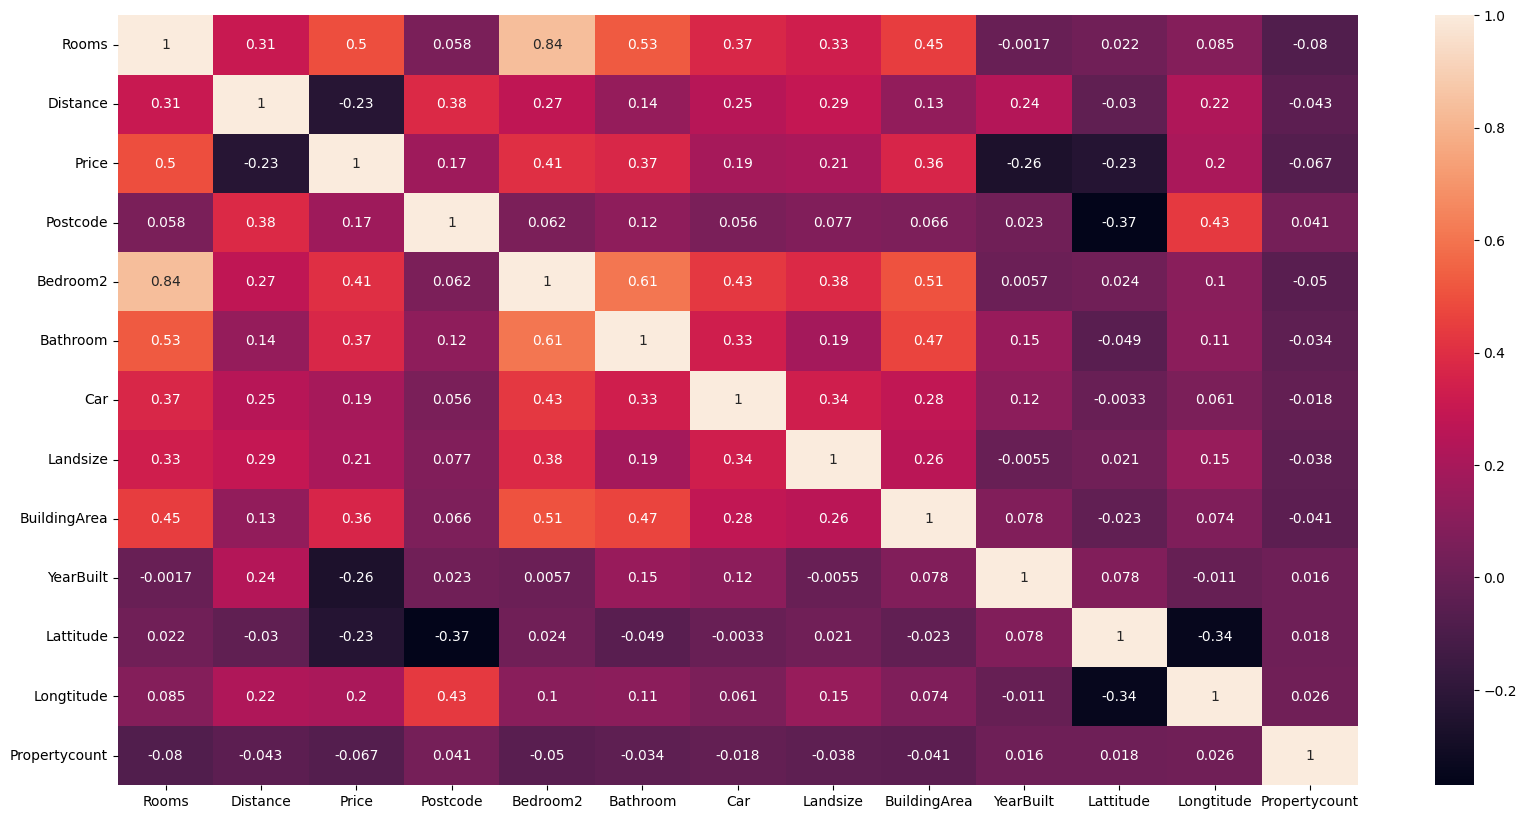

In [ ]:
corr=df_new_copy[num_cols].corr()
plt.figure(figsize=(20,10))

sns.heatmap(corr,annot=True)

Since there is high correlation rate between Rooms and Bedroom2. I checked their difference

In [ ]:
df_new_copy["Rooms"]-df_new_copy["Bedroom2"]

1        0.000000
2        0.000000
4        0.000000
5        0.000000
6        1.000000
           ...   
34852    0.000000
34853    0.000000
34854    0.000000
34855   -0.043641
34856    0.000000
Length: 27247, dtype: float64

As we can see there is so minor differences. So we can drop Bedroom2 variable to not make our model more complex

In [ ]:
df_new_copy.drop("Bedroom2",axis=1,inplace=True)

One Hot Off Encoding

In [ ]:
#Since Adress is not a good decisive variable for our dependent variable we can drop it.

df_new_copy.drop("Address",inplace=True,axis=1)
df_new_copy.head()

,Suburb,Type,Method,SellerG,Date,CouncilArea,Regionname,Rooms,Distance,Price,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
1,Abbotsford,h,S,Biggin,3/12/2016,Yarra City Council,Northern Metropolitan,2,2.5,1480000.0,3067.0,1.0,1.0,202.0,146.36963,1966.667411,-37.7996,144.9984,4019.0
2,Abbotsford,h,S,Biggin,4/02/2016,Yarra City Council,Northern Metropolitan,2,2.5,1035000.0,3067.0,1.0,0.0,156.0,79.00000,1900.000000,-37.8079,144.9934,4019.0
4,Abbotsford,h,SP,Biggin,4/03/2017,Yarra City Council,Northern Metropolitan,3,2.5,1465000.0,3067.0,2.0,0.0,134.0,150.00000,1900.000000,-37.8093,144.9944,4019.0
5,Abbotsford,h,PI,Biggin,4/03/2017,Yarra City Council,Northern Metropolitan,3,2.5,850000.0,3067.0,2.0,1.0,94.0,146.36963,1966.667411,-37.7969,144.9969,4019.0
6,Abbotsford,h,VB,Nelson,4/06/2016,Yarra City Council,Northern Metropolitan,4,2.5,1600000.0,3067.0,1.0,2.0,120.0,142.00000,2014.000000,-37.8072,144.9941,4019.0


In [ ]:
cat_cols.remove("Address")


In [ ]:
df_le = df_new_copy.copy()

def label_encoding(column_name):
  label_encoder = LabelEncoder()
  # le.fit(df_le[column_name].drop_duplicates())
  df_le[column_name] = label_encoder.fit_transform(df_new_copy[column_name])

In [ ]:
#Since Suburb and SellerG has so much unique values we can use label encoder for that variables to not make our model more complex
label_variables=["Suburb","SellerG"]

In [ ]:
for col in label_variables:
  label_encoding(col)
df_le.head()

,Suburb,Type,Method,SellerG,Date,CouncilArea,Regionname,Rooms,Distance,Price,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
1,0,h,S,32,3/12/2016,Yarra City Council,Northern Metropolitan,2,2.5,1480000.0,3067.0,1.0,1.0,202.0,146.36963,1966.667411,-37.7996,144.9984,4019.0
2,0,h,S,32,4/02/2016,Yarra City Council,Northern Metropolitan,2,2.5,1035000.0,3067.0,1.0,0.0,156.0,79.00000,1900.000000,-37.8079,144.9934,4019.0
4,0,h,SP,32,4/03/2017,Yarra City Council,Northern Metropolitan,3,2.5,1465000.0,3067.0,2.0,0.0,134.0,150.00000,1900.000000,-37.8093,144.9944,4019.0
5,0,h,PI,32,4/03/2017,Yarra City Council,Northern Metropolitan,3,2.5,850000.0,3067.0,2.0,1.0,94.0,146.36963,1966.667411,-37.7969,144.9969,4019.0
6,0,h,VB,206,4/06/2016,Yarra City Council,Northern Metropolitan,4,2.5,1600000.0,3067.0,1.0,2.0,120.0,142.00000,2014.000000,-37.8072,144.9941,4019.0


In [ ]:
cat_cols.remove("Suburb")

In [ ]:
cat_cols.remove("SellerG")

In [ ]:
one_hot = pd.get_dummies(df_new_copy[cat_cols],drop_first=True)
one_hot.head()

,Type_t,Type_u,Method_PN,Method_S,Method_SA,Method_SN,Method_SP,Method_SS,Method_VB,Method_W,...,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
1,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
6,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0


In [ ]:
df_le.reset_index(drop=True, inplace=True)
one_hot.reset_index(drop=True, inplace=True)

In [ ]:
df_new_copy=pd.concat([df_le,one_hot],axis="columns")
df_new_copy.drop(cat_cols,axis=1,inplace=True)

In [ ]:
df_new_copy.head()

,Suburb,SellerG,Rooms,Distance,Price,Postcode,Bathroom,Car,Landsize,BuildingArea,...,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,0,32,2,2.5,1480000.0,3067.0,1.0,1.0,202.0,146.36963,...,0,1,0,0,1,0,0,0,0,0
1,0,32,2,2.5,1035000.0,3067.0,1.0,0.0,156.0,79.00000,...,0,1,0,0,1,0,0,0,0,0
2,0,32,3,2.5,1465000.0,3067.0,2.0,0.0,134.0,150.00000,...,0,1,0,0,1,0,0,0,0,0
3,0,32,3,2.5,850000.0,3067.0,2.0,1.0,94.0,146.36963,...,0,1,0,0,1,0,0,0,0,0
4,0,206,4,2.5,1600000.0,3067.0,1.0,2.0,120.0,142.00000,...,0,1,0,0,1,0,0,0,0,0


In [ ]:
df_new_copy.isnull().sum()

Suburb                                   0
SellerG                                  0
Rooms                                    0
Distance                                 0
Price                                    0
                                        ..
Regionname_Northern Victoria             0
Regionname_South-Eastern Metropolitan    0
Regionname_Southern Metropolitan         0
Regionname_Western Metropolitan          0
Regionname_Western Victoria              0
Length: 140, dtype: int64

Scaling and Model Training

In [ ]:
X=df_new_copy.drop("Price",axis=1)
y=df_new_copy["Price"]

In [ ]:
scaler=StandardScaler()
X=scaler.fit_transform(X)


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
models_dict = {
  'Lasso': {
    'model': Lasso()
  },
  'LinearRegression': {
    'model': LinearRegression()
  },
  'Ridge': {
    'model': Ridge()
  },
  'ElasticNet': {
    'model': ElasticNet()
  },
  'KNeighborsRegressor': {
    'model': KNeighborsRegressor()
  },
  'RandomForestRegressor': {
    'model': RandomForestRegressor()
  },
  'GradientBoostingRegressor': {
    'model': GradientBoostingRegressor()
  },
  'AdaBoostRegressor': {
    'model': AdaBoostRegressor(n_estimators = 5, learning_rate = 1.2, loss = 'exponential', random_state = 2)
  },
   'CatBoostRegressor':  {
      'model': CatBoostRegressor(metric_period=100)
   }

  }


In [ ]:
for key, item in models_dict.items():
  model = item.get('model')

  model.fit(X_train,y_train)


Learning rate set to 0.065951
0:	learn: 489533.8775360	total: 55ms	remaining: 55s
100:	learn: 222703.2539862	total: 687ms	remaining: 6.11s
200:	learn: 205129.7693698	total: 1.3s	remaining: 5.18s
300:	learn: 195489.1997226	total: 1.92s	remaining: 4.46s
400:	learn: 188781.0816585	total: 2.54s	remaining: 3.79s
500:	learn: 183433.3979780	total: 3.14s	remaining: 3.12s
600:	learn: 179123.2767344	total: 3.76s	remaining: 2.5s
700:	learn: 175341.7682814	total: 4.36s	remaining: 1.86s
800:	learn: 171903.3772525	total: 4.99s	remaining: 1.24s
900:	learn: 168779.1496352	total: 5.63s	remaining: 618ms
999:	learn: 165990.4132487	total: 6.22s	remaining: 0us


In [ ]:
def regression_performance_evaluation(key,preds):
  r_squared = r2_score(y_test, preds)
  mae = mean_absolute_error(y_test, preds)
  mse = mean_squared_error(y_test, preds)
  rmse = np.sqrt(mse)

  print("*** Model: ", key , ' ***')
  print("R2 Score:", r_squared)
  print('Mean Absolute Error:', mae)
  print('Mean Squared Error:', mse)
  print('Root Mean Squared Error:', rmse)

  print()


In [ ]:
for key, item in models_dict.items():

  model = item.get('model')

  y_preds = model.predict(X_test)

  item.update({"y_preds": y_preds})


In [ ]:
for key, item in models_dict.items():

  model = item.get('model')

  y_preds = item.get('y_preds')

  regression_performance_evaluation(key,y_preds)


*** Model:  Lasso  ***
R2 Score: 0.7217772852161772
Mean Absolute Error: 202673.96216147274
Mean Squared Error: 70789441072.54465
Root Mean Squared Error: 266062.8517334666

*** Model:  LinearRegression  ***
R2 Score: 0.7217798460191018
Mean Absolute Error: 202676.05144470543
Mean Squared Error: 70788789516.08252
Root Mean Squared Error: 266061.62728977384

*** Model:  Ridge  ***
R2 Score: 0.7217774658820304
Mean Absolute Error: 202673.79981474092
Mean Squared Error: 70789395104.92917
Root Mean Squared Error: 266062.76534857176

*** Model:  ElasticNet  ***
R2 Score: 0.6721588960389955
Mean Absolute Error: 218613.4239532879
Mean Squared Error: 83414068215.23444
Root Mean Squared Error: 288814.93765945424

*** Model:  KNeighborsRegressor  ***
R2 Score: 0.5026089862372733
Mean Absolute Error: 262222.9620963007
Mean Squared Error: 126553404836.58115
Root Mean Squared Error: 355743.4536805718

*** Model:  RandomForestRegressor  ***
R2 Score: 0.8327542236778991
Mean Absolute Error: 138880.28

Our most succesful model is CatBoostRegressor

Feature Importance

In [ ]:
Model=CatBoostRegressor(metric_period=100).fit(X_train,y_train)

Learning rate set to 0.065951
0:	learn: 489533.8775360	total: 7.7ms	remaining: 7.69s
100:	learn: 222703.2539862	total: 671ms	remaining: 5.97s
200:	learn: 205129.7693698	total: 2.1s	remaining: 8.33s
300:	learn: 195489.1997226	total: 3.53s	remaining: 8.2s
400:	learn: 188781.0816585	total: 4.13s	remaining: 6.17s
500:	learn: 183433.3979780	total: 4.76s	remaining: 4.74s
600:	learn: 179123.2767344	total: 5.36s	remaining: 3.56s
700:	learn: 175341.7682814	total: 5.97s	remaining: 2.55s
800:	learn: 171903.3772525	total: 6.58s	remaining: 1.63s
900:	learn: 168779.1496352	total: 7.17s	remaining: 788ms
999:	learn: 165990.4132487	total: 7.78s	remaining: 0us


In [ ]:
def plot_importance(model,features,num=len(X)):
  feature_imp=pd.DataFrame({"Value":model.feature_importances_,"Feature":features.columns})
  plt.figure(figsize=(20,20))
  sns.set(font_scale=1)
  sns.barplot(x="Value",y="Feature",data=feature_imp.sort_values(by="Value",ascending=False)[0:num])
  plt.title("Features")
  plt.tight_layout()
  plt.show()

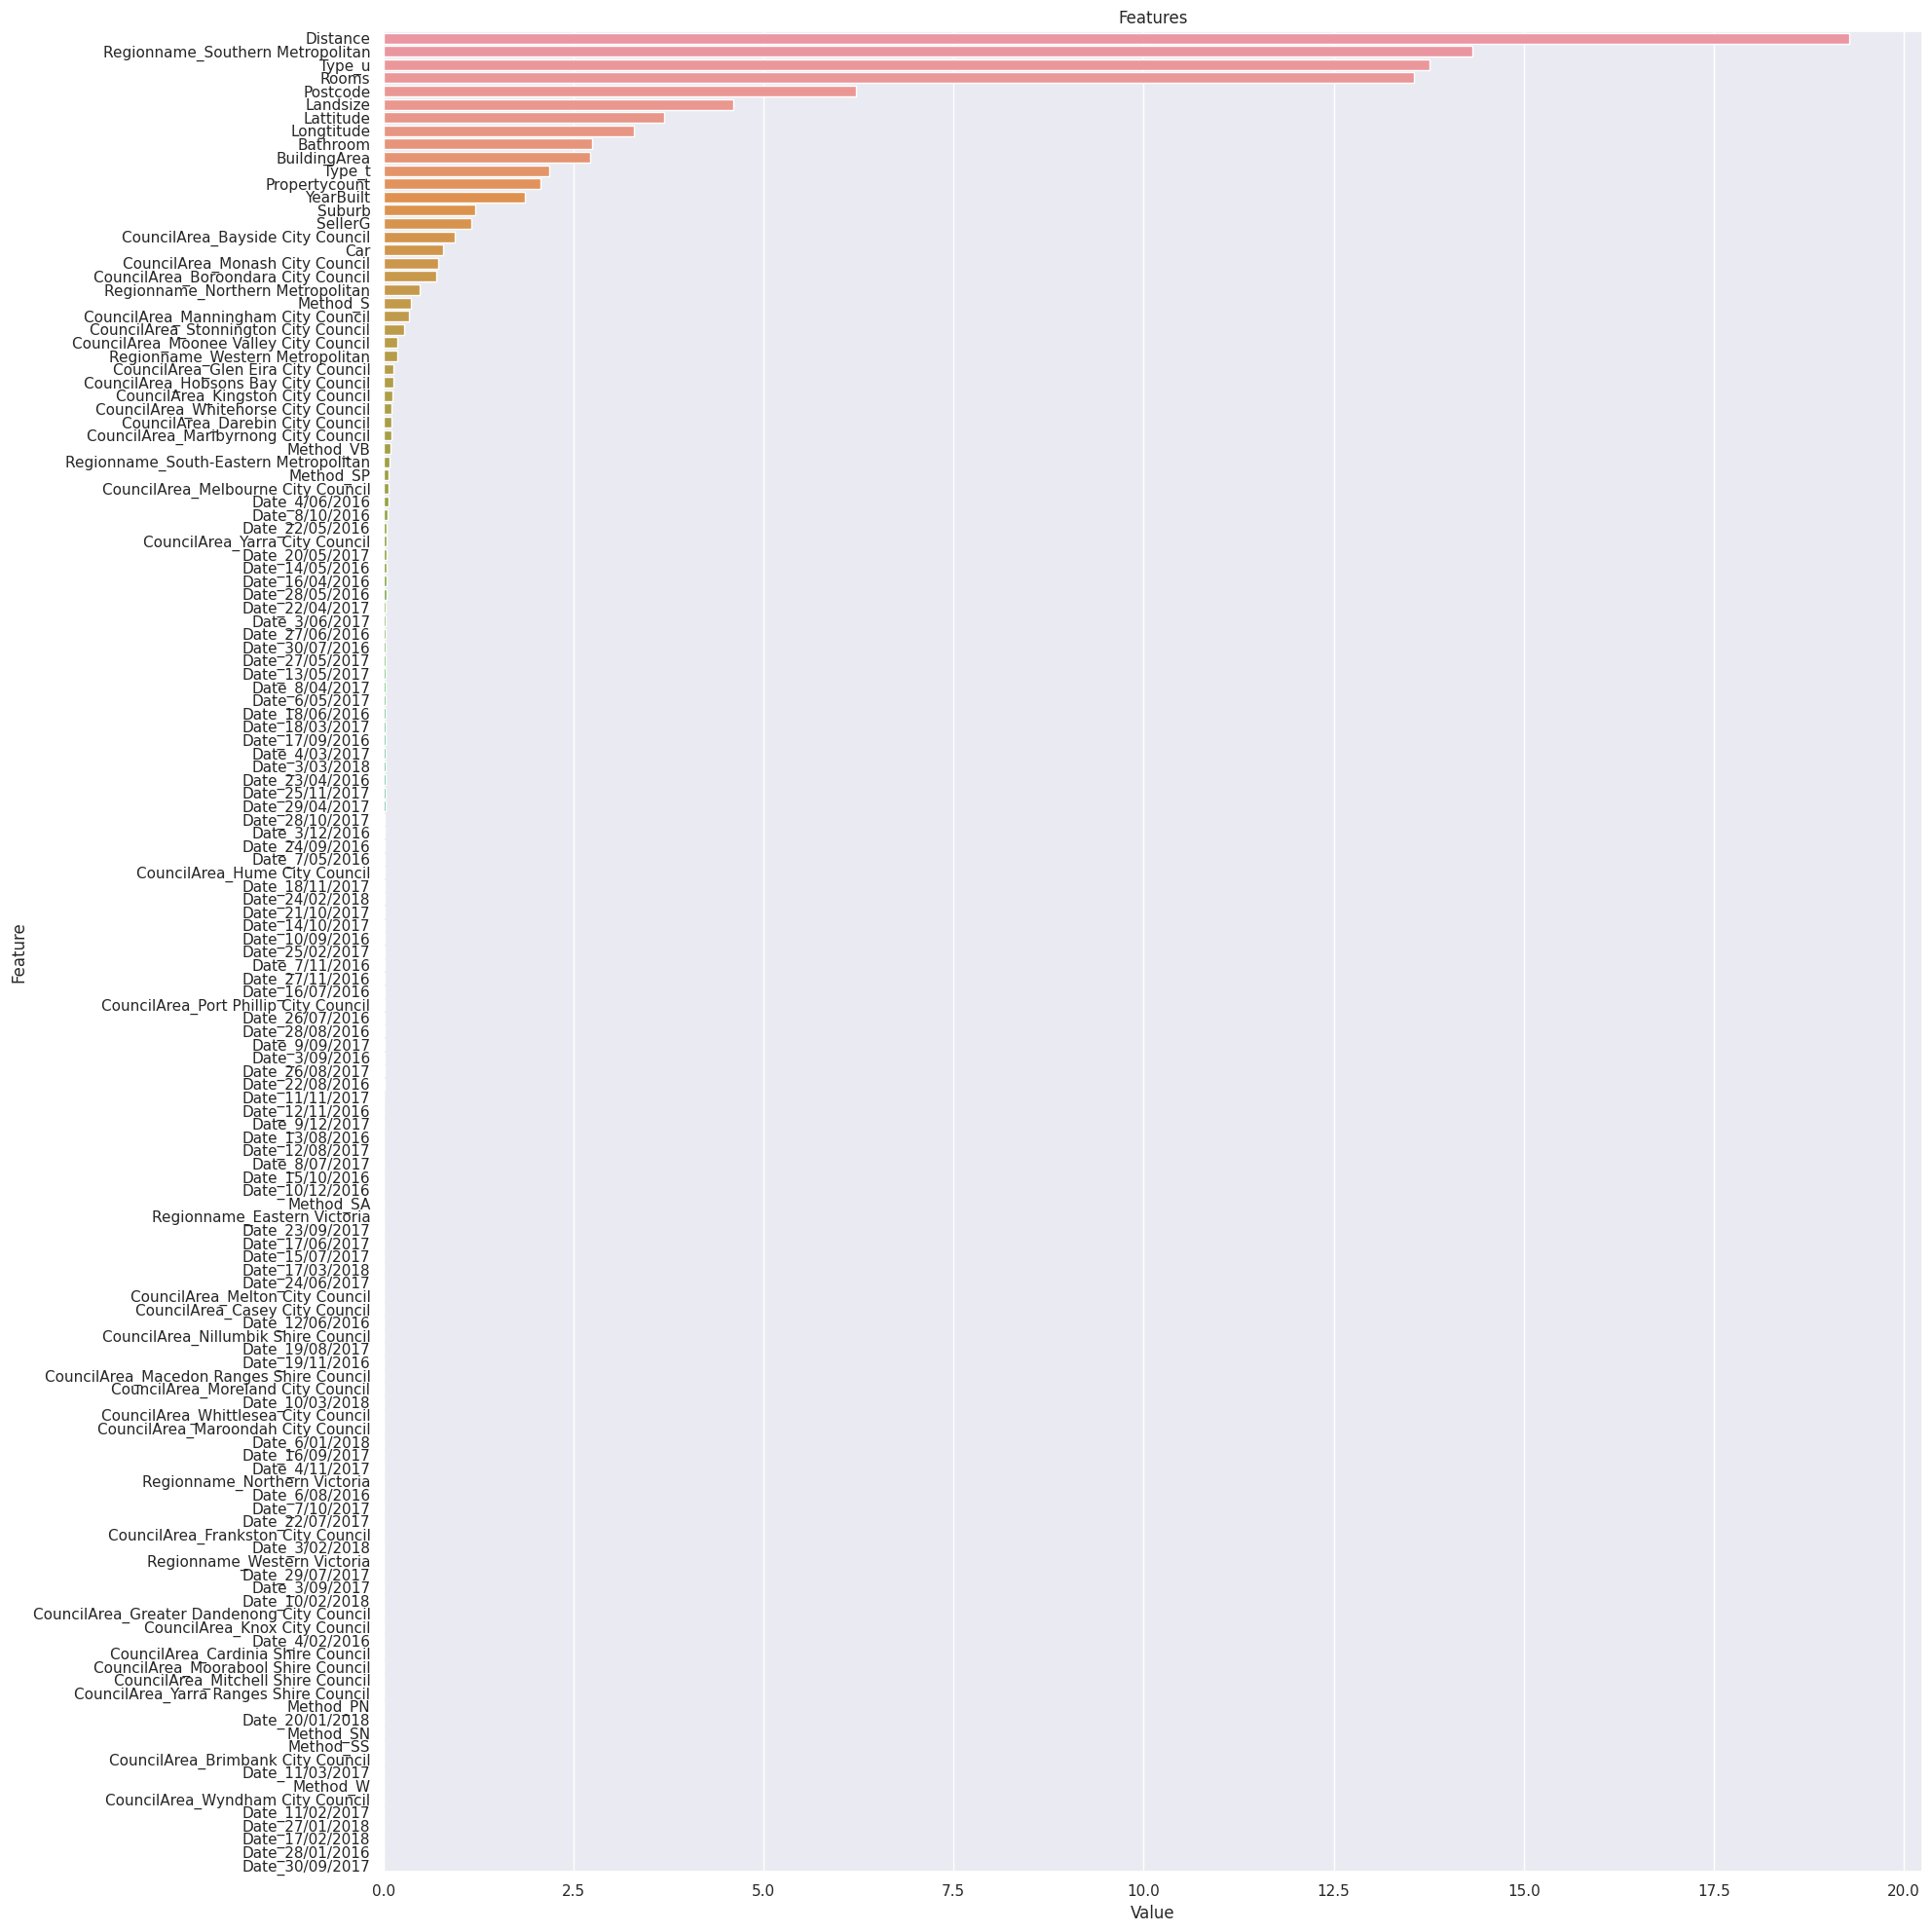

In [ ]:
plot_importance(Model,X)